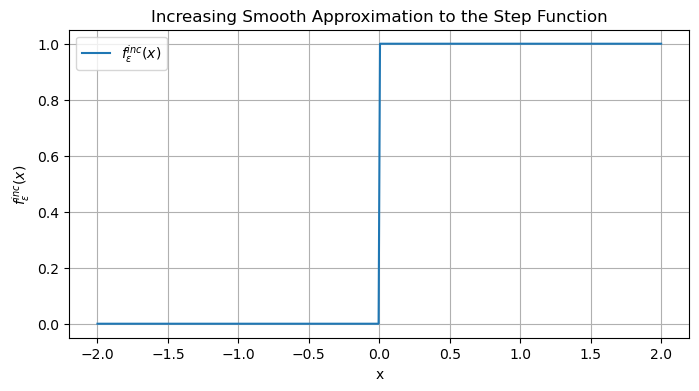

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f_eps_increasing(x, x0, eps):
    """
    Smooth increasing approximation to the step function:
      f(x) = 0                           for x <= x0 - eps,
      f(x) = 0.5 * (1 - cos(pi*(x - (x0-eps))/(2*eps)))  for x0 - eps < x < x0 + eps,
      f(x) = 1                           for x >= x0 + eps.

    Parameters:
      x   : array_like, input values
      x0  : float, center of the transition region (midpoint is x0)
      eps : float, half-width of the transition region

    Returns:
      Array of values approximating the increasing step function.
    """
    # Convert x to a NumPy array for vectorized operations.
    x = np.array(x)
    f = np.zeros_like(x)
    
    # For x <= x0 - eps, the function is 0.
    f[x <= x0 - eps] = 0.0
    
    # For x >= x0 + eps, the function is 1.
    f[x >= x0 + eps] = 1.0
    
    # In the transition region, use a cosine bump that increases from 0 to 1.
    transition = (x > x0 - eps) & (x < x0 + eps)
    f[transition] = 0.5 * (1 - np.cos(np.pi * (x[transition] - (x0 - eps)) / (2 * eps)))
    
    return f

# Example usage:
x0 = 0.0   # Center of the transition (midpoint)
eps = 0.001  # Half-width of the transition region

# Generate an array of x values.
x_vals = np.linspace(-2, 2, 400)
y_vals = f_eps_increasing(x_vals, x0, eps)

# Plot the function.
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=r'$f_\epsilon^{inc}(x)$')
plt.title('Increasing Smooth Approximation to the Step Function')
plt.xlabel('x')
plt.ylabel(r'$f_\epsilon^{inc}(x)$')
plt.legend()
plt.grid(True)
plt.show()